### Polynomial Regression Explained 📈

* **Definition:** A form of **linear regression** that models the relationship between variables as an **n-th degree polynomial** to fit a curved line to the data.
* **Main Goal:** To capture **non-linear relationships** that cannot be accurately represented by a straight line.

***

### The Polynomial Equation

* **Variables:** Can involve a single independent variable ($x$), but the model uses higher powers of that variable.
* **Equation:** $y = c + m_1x + m_2x^2 + \dots + m_nx^n$
    * $y$: **Predicted dependent variable**.
    * $x$: **Independent variable**.
    * $c$: **Y-intercept**.
    * $m_1, m_2, \dots, m_n$: **Coefficients** (or weights) for each polynomial term.
    * $n$: **Degree of the polynomial**, which determines the complexity of the curve.

***

### How It Works

* **Feature Transformation:** The independent variable is transformed into a set of polynomial features (e.g., $x$, $x^2$, $x^3$).
* **Linear Fitting:** A standard **multiple linear regression model** is then fitted to these new, transformed features.
* **Curve:** The model finds the coefficients that minimize the **sum of squared errors**, just like linear regression, but because it's fitted to the non-linear features, the resulting prediction line is a **curve**.

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [9]:
df=pd.read_csv(r"G:\Docs\Macchine Learning\Polynomial Regression\Polynomial Regression.csv")
df.head()

,Feature1_X,Feature2_Sin,Feature3_Cos,Target_Y
0,-10.000000,5.415919,1.412162,-4314.156144
1,-9.959920,4.643102,1.658929,-4231.601601
2,-9.919840,3.574651,0.975062,-4201.691316
3,-9.879760,3.724661,1.019684,-4057.740787
4,-9.839679,3.248071,1.875917,-3970.548385


In [10]:
x=df[["Feature1_X","Feature2_Sin","Feature3_Cos"]]
y=df["Target_Y"]
x_train,x_temp,y_train,y_temp=train_test_split(x,y,test_size=0.4,random_state=42)
x_val,x_test,y_val,y_test=train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)
print("train set shape:",x_train.shape)
print("test set shape:",x_test.shape)
print("validation set shape:",x_val.shape)

train set shape: (300, 3)
test set shape: (100, 3)
validation set shape: (100, 3)


In [11]:
poly=PolynomialFeatures(degree=2,include_bias=False)
x_train_poly=poly.fit_transform(x_train)
x_val_poly=poly.fit_transform(x_val)
x_test_poly=poly.fit_transform(x_test)

lin_model=LinearRegression()
lin_model.fit(x_train_poly,y_train)

y_pred=lin_model.predict(x_test_poly)

In [ ]:
train_score = lin_model.score(x_train_poly, y_train)
val_score = lin_model.score(x_val_poly, y_val)
test_score = lin_model.score(x_test_poly, y_test)

print("R-squared score on the training set:", train_score)
print("R-squared score on the validation set:", val_score)
print("R-squared score on the test set:", test_score)


print("Mean Squared Error:", mean_squared_error(y_test_poly, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test_poly, y_pred))
print("R2 Score:", r2_score(y_test_poly, y_pred))

R-squared score on the training set: 0.9307747624379472
R-squared score on the validation set: 0.9352871555476181
R-squared score on the test set: 0.9433886811076744
Mean Squared Error: 153118.82322408454
Mean Absolute Error: 306.1362918583932
R2 Score: 0.9433886811076744


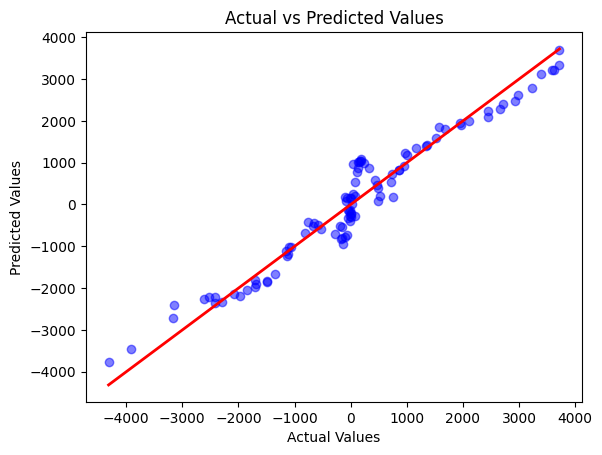

In [16]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.show()


Polynomial regression uses linear fitting because it is a linear model **in terms of its coefficients**, not its independent variables. The reason you are getting 9 values is due to the number of new features created from your original three features.

***

### Why We Use Linear Fitting for Polynomial Regression

Polynomial regression is essentially a clever application of multiple linear regression. The process works in two main steps:

1.  **Feature Transformation:** The original features (`x`) are transformed into a new set of polynomial features (e.g., $x$, $x^2$, $x^3$).
2.  **Linear Model Application:** A standard linear regression model is then fitted to these **transformed** features. The algorithm finds the coefficients for each of these new features.

This approach is still considered linear regression because the relationship to the coefficients ($m_1$, $m_2$, etc.) is linear. This makes it possible to use the same efficient fitting methods and algorithms that are used for multiple linear regression.

***

### Why the Model Returns 9 Values

Your original dataset had three independent variables: `Feature1_X`, `Feature2_Sin`, and `Feature3_Cos`.

When you set the `degree=2` for the `PolynomialFeatures` function, it generates all possible combinations of the original features up to that degree. This results in the creation of nine new features:

1.  The three original features:
    * `Feature1_X`
    * `Feature2_Sin`
    * `Feature3_Cos`
2.  The three squared terms:
    * `Feature1_X^2`
    * `Feature2_Sin^2`
    * `Feature3_Cos^2`
3.  The three interaction terms:
    * `Feature1_X Feature2_Sin`
    * `Feature1_X Feature3_Cos`
    * `Feature2_Sin Feature3_Cos`

The linear regression model then calculates a unique coefficient for each of these nine new features, which is why the output showed an array of 9 coefficient values. The model also calculates an intercept value, which is not part of the coefficient array.









It's not compulsory to specify the `degree` and `include_bias` parameters, but understanding their defaults and effects is crucial for building an effective model.

---

### `degree`
The `degree` parameter is **not compulsory** because it has a default value of `2`.

* **What it does:** This parameter determines the **highest power** of the independent variable(s) that will be included in the model. A degree of 1 creates a straight line (simple linear regression), while a degree of 2 creates a parabolic curve, and so on.
* **What happens if you don't specify it:** If you don't provide a `degree` value, the `PolynomialFeatures` function will use the default value of `2`. This might not be the best fit for your data, as a lower degree could lead to **underfitting** (a model that is too simple) and a higher degree could lead to **overfitting** (a model that is too complex).

---

### `include_bias`
The `include_bias` parameter is also **not compulsory** and its default value is `True`.

* **What it does:** When set to `True`, it adds a column of all `1s` to your transformed feature set. This column represents the **intercept** ($c$) of the linear regression equation.
* **What happens if you don't specify it:** The default `True` value means that a redundant feature for the intercept will be created. Since `LinearRegression` models already calculate an intercept by default, this can lead to a slight redundancy. It won't break the model, but it's a good practice to set it to `False` to avoid this.